In [1]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

## Data

In [2]:
# Step 1: USE any URL (e.g. Wikipedia)
url = "https://en.wikipedia.org/wiki/Cairo_University"

# Step 2: Extract HTML from URL
response = requests.get(url)
html = response.text

# Step 3: Extract TEXT from HTML page (p or headings)
soup = BeautifulSoup(html, "html.parser")
text = " ".join([p.get_text() for p in soup.find_all(['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6'])])

## Processing on Data

In [3]:
# Step 1: Cleaning data from each symbol or character doesn’t contain to the data.
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)

# Step 2: Normalization: make all the data to lower case
normalized_text = cleaned_text.lower()

# Step 3: Tokenization: split the data to words
words = word_tokenize(normalized_text)

# Step 4: Lemmatization or Stemming: return each word to origin.
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

# Step 5: Stop words: remove stop words from the data.
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in lemmatized_words if word not in stop_words]

## Unique Words

In [4]:
unique_words = set(filtered_words) # Get unique words 
word_count = Counter(filtered_words) # Count the words
print("Unique words:", len(unique_words))
print('-'*50)
for i, word in enumerate(unique_words):
    print(f'{word}[{word_count[word]}]', end="\n" if (i + 1) % 15 == 0 else " ")

Unique words: 486
--------------------------------------------------
patronage[1] santillana[1] medical[2] american[2] female[1] education[11] neglected[1] legal[1] ranking[3] kulliyat[1] many[1] emerged[1] usually[1] italian[2] prominent[2]
refurbish[1] call[3] le[2] italy[1] wa[26] qasrelayni[1] preceded[1] hall[1] civil[1] abduh[3] large[1] agriculture[1] western[1] refounded[1] sudan[1]
teacher[1] nearly[1] enrollment[1] family[1] library[1] monthly[1] top[1] established[3] pasha[2] institute[2] world[4] europeaninspired[1] model[3] rule[1] indigenous[1]
received[1] added[1] invasion[1] beginning[1] rector[1] campus[3] three[2] madrasa[1] al[1] public[3] group[1] served[1] alumniedit[1] wafdists[1] post[4]
launching[1] teach[1] external[1] budget[1] opened[1] aladab[1] fear[2] referencesedit[1] nationalistic[1] missionary[1] said[1] louis[1] retired[1] campaign[1] across[2]
funded[1] early[4] nobel[2] farid[1] school[18] east[1] alulum[1] significant[1] veil[1] representative[1] sa

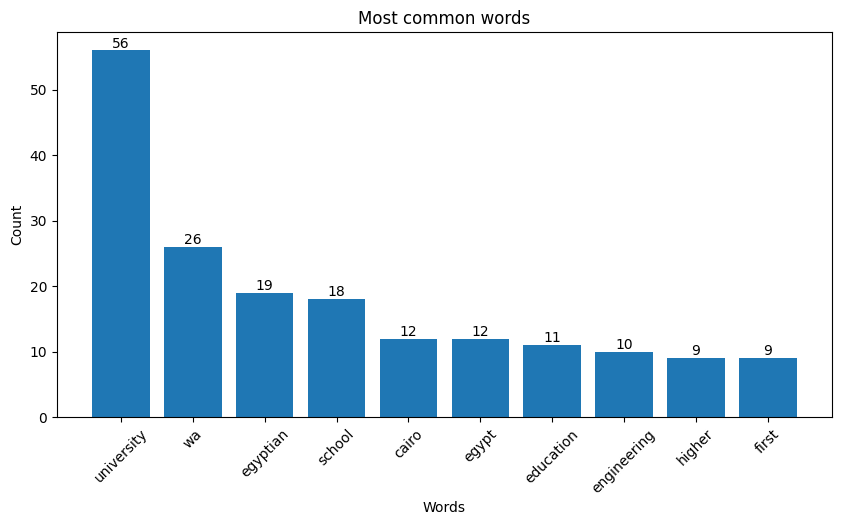

In [5]:
# Get the most common words and their counts
top_words = word_count.most_common(10) # Get the top 10 words
words = [word[0] for word in top_words] # Get the words
counts = [word[1] for word in top_words] # Get the counts

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title("Most common words")
plt.xlabel("Words")
plt.ylabel("Count")
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()


In [6]:
# print each word less than 3 characters
print('-'*50)
print("Words less than 3 characters:", [word for word in unique_words if len(word) < 3])



--------------------------------------------------
Words less than 3 characters: ['le', 'wa', 'al', 'th', 'ii', 'go', 'ha', 'q', 'st', 'nd']
